# Performing Data Analysis Task Lab 1

##### Here, we are implement any machine learning algorithm  

## Titanic: Machine Learning from Disaster

#### This is the legendary Titanic ML task form kaggle platform URL: (https://www.kaggle.com/c/titanic)|

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Data importing

In [3]:
data = pd.read_csv('train.csv')

#### Data discription

In [4]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
data.shape

(891, 12)

#### This dataset already partition into train and test data. Here we looking at train part where 891 data points each with 12 different aspect.
1. 'Survived' has two values 0 and 1 for 0 = not survived and 1 = survived.
2. Pclass means ticket class 1 = 1st class, 2 = 2nd class and 3 = 3rd class.
3. SibSp means # of siblings / spouses aboard the Titanic.
4. Parch means # of parents / children aboard the Titanic.
5. Ticket is ticket number.
6. Cabin for cabin number.
7. Embarked has 3 values as C = Cherbourg, Q = Queenstown, S = Southampton

### Data information 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


All data type seem good, so we don't need to change any thing. 

#### Checking for null values

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

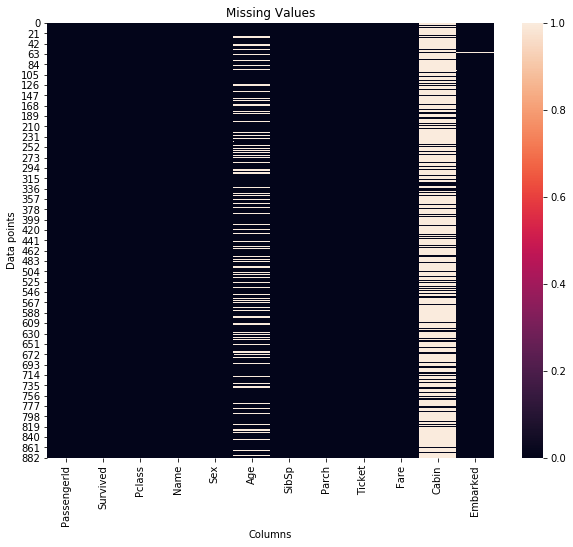

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.isnull(), ax=ax).set(title = 'Missing Values', xlabel = 'Columns', ylabel = 'Data points')
plt.show()

#### Their are 177 missing data points in 'age' that needs to fill and 687 missing data points in 'cabin' but this field not useful for any ML task so we can ignore.

### Basic Analysis of Dataset

In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
data.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nicola-Yarred, Miss. Jamila",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


### Filling missing data points in 'Age'

Their are 177 missing points

In [18]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
data['Age'].mode()

0    24.0
dtype: float64

[Text(0.5, 1.0, 'Boxplot for Age')]

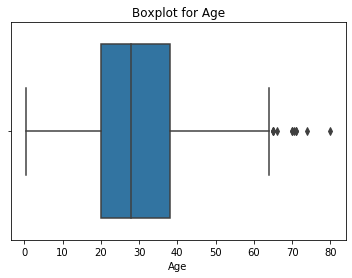

In [20]:
sns.boxplot(data['Age']).set(title = 'Boxplot for Age')